# Lab Activity 5: **Bias, Variance, and Cross-Validation using Linear Regression**

### **Objective**

* To understand the concepts of **bias**, **variance**, and their **trade-off** in machine learning models.
* To implement **cross-validation** for performance estimation.
* To observe how different values of cross-validation folds (k) affect model bias and variance.
* To identify the optimal k-value that minimizes error.

## Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
from statistics import mean, stdev

## Load and Explore the Dataset

In [2]:
data = pd.read_csv("winequality-white.csv")
print('Dimensions of the dataset:', data.shape)
print('First 5 rows of the dataset:')
print(data.head())

Dimensions of the dataset: (4898, 12)
First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality

## Extract Features and Labels

In [3]:
col_names = list(data.columns)
print('Attribute names:', col_names)

feature_names = col_names[:-1]
print('Feature names:', feature_names)

x_set = data.drop('quality', axis=1)
y_set = data['quality']

Attribute names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## 10-Fold Cross-Validation (Initial Test)

In [4]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, x_set, y_set, cv=10)
print("Mean Accuracy (10-fold):", mean(scores))
print("Standard Deviation:", stdev(scores))

Mean Accuracy (10-fold): 0.24979103983582931
Standard Deviation: 0.06731555071477624


## Bias-Variance for Different k Values

In [5]:
k_list = range(2, 200)
bias = []
variance = []

for k in k_list:
    model = linear_model.LinearRegression()
    scores = cross_val_score(model, x_set, y_set, cv=k)
    bias.append(mean(scores))
    variance.append(stdev(scores))

## Plot Bias vs Variance

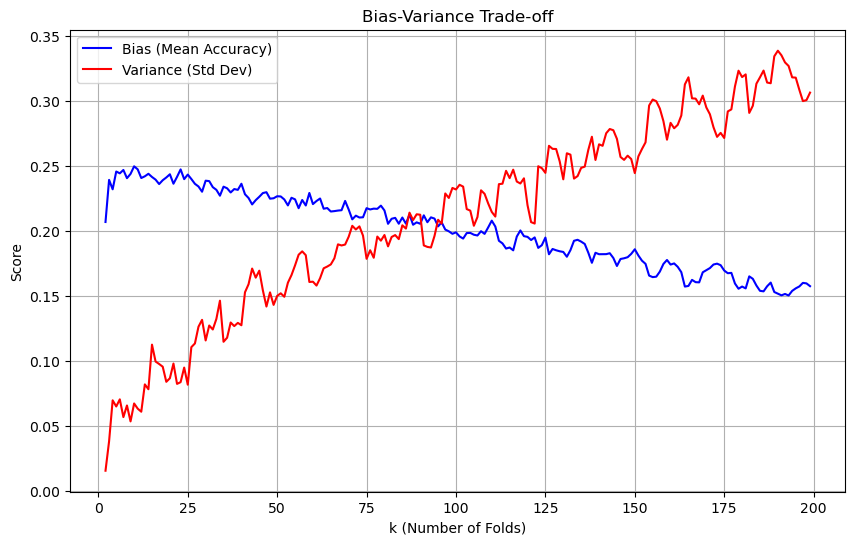

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(k_list, bias, 'b', label='Bias (Mean Accuracy)')
plt.plot(k_list, variance, 'r', label='Variance (Std Dev)')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Score')
plt.title('Bias-Variance Trade-off')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Final Bias and Variance with Optimal k

In [7]:
best_k = 85  # Based on plot observation
model = linear_model.LinearRegression()
scores = cross_val_score(model, x_set, y_set, cv=best_k)

bias_final = mean(scores)
variance_final = stdev(scores)

print("Final Bias (mean accuracy):", bias_final)
print("Final Variance (std dev):", variance_final)

Final Bias (mean accuracy): 0.2103699244565074
Final Variance (std dev): 0.2043934223349577


### **Conclusion**

* As `k` increases, **bias** may increase slightly, while **variance** tends to decrease.
* An optimal value of `k` balances bias and variance.
* **Cross-validation** helps estimate model performance more reliably.
* This experiment demonstrates the importance of tuning hyperparameters (like `k`) to optimize learning performance.